# Key Concepts 

#### GHI (Global Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar total recibida por la superficie horizontal de la Tierra, incluyendo la radiación directa del sol, la radiación difusa (reflejada por la atmósfera) y la radiación del cielo nublado.
#### DNI (Direct Normal Irradiance) [W/m2]: 
Es la cantidad de radiación solar directa recibida por un panel solar colocado perpendicularmente al sol. No incluye la radiación difusa ni la radiación reflejada.
#### DHI (Diffuse Horizontal Irradiance) [W/m2]: 
Se refiere a la radiación solar difusa que llega a la superficie de la Tierra proveniente de todas las direcciones del cielo, excepto la radiación directa del sol.
#### EBH (Extra-terrestrial Beam Horizontal): 
Es la radiación solar directa que llegaría a la superficie de la Tierra si la atmósfera no estuviera presente. Representa la radiación solar directa del sol en el espacio.
#### Cloud Opacity (Cloudiness): 
Es la medida de la opacidad de las nubes en el cielo. Indica cuánto del cielo está cubierto por nubes y afecta la cantidad de radiación solar que llega a la superficie.

## Import Libraries

In [1]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas
import json

## Read JSON File

In [3]:
# Abrir el archivo JSON
with open('../Data/Raw/nasa2.json') as f:
    data = json.load(f)

# Extraer DNI del archivo JSON
DNI = data['properties']['parameter']['ALLSKY_SFC_SW_DNI']
# print(DNI)
# Extraer DHI del archivo JSON
DHI = data['properties']['parameter']['ALLSKY_SFC_SW_DIFF']
# print(DHI)
# Extraer GHI del archivo JSON
GHI = data['properties']['parameter']['ALLSKY_SFC_SW_DWN']
# print(GHI)


#<class 'dict'> guardar solo el key 
Date = list(DNI.keys())
# print(Date)
#<class 'dict'> guardar solo el value
DNI = list(DNI.values())
# print(DNI)
DHI = list(DHI.values())
# print(DHI)
GHI = list(GHI.values())
# print(GHI)

# Crear un dataframe con los datos Date, DNI, DHI, GHI
df = pd.DataFrame({'Date': Date, 'DNI': DNI, 'DHI': DHI, 'GHI': GHI})
df['DNI'] = df['DNI'] * 100
df['DHI'] = df['DHI'] * 100
df['GHI'] = df['GHI'] * 100
print(df.shape)
df.head(5)  # muestra los 5 primeros registros del dataframe

(305, 4)


,Date,DNI,DHI,GHI
0,20230101,400.0,200.0,469.0
1,20230102,135.0,203.0,294.0
2,20230103,263.0,251.0,438.0
3,20230104,412.0,210.0,496.0
4,20230105,161.0,191.0,306.0


## New df with daily information

In [4]:
# print(df.shape)
# Obtener los valores únicos en la columna 'Date'
unique_dates = df['Date'].unique()
# print(unique_dates)


# Filtrar los datos donde 'GHI' no es 0
df_filtered = df[df['GHI'] != 0]
# Encontrar el promedio de 'GHI' para cada fecha única, excluyendo los valores donde 'GHI' es 0
average_GHI_per_date = df_filtered.groupby('Date')['GHI'].mean()
average_DHI_per_date = df_filtered.groupby('Date')['DHI'].mean()
average_DNI_per_date = df_filtered.groupby('Date')['DNI'].mean()
# print(average_GHI_per_date)

# Crear un nuevo DataFrame
new_df = pd.DataFrame({
    'Date': unique_dates,
    'Average_GHI': average_GHI_per_date.values,
    'Average_DHI': average_DHI_per_date.values,
    'Average_DNI': average_DNI_per_date.values
})

print(new_df.head())
print(new_df.shape)

       Date  Average_GHI  Average_DHI  Average_DNI
0  20230101        469.0        200.0        400.0
1  20230102        294.0        203.0        135.0
2  20230103        438.0        251.0        263.0
3  20230104        496.0        210.0        412.0
4  20230105        306.0        191.0        161.0
(305, 4)


## Graph for Daily information

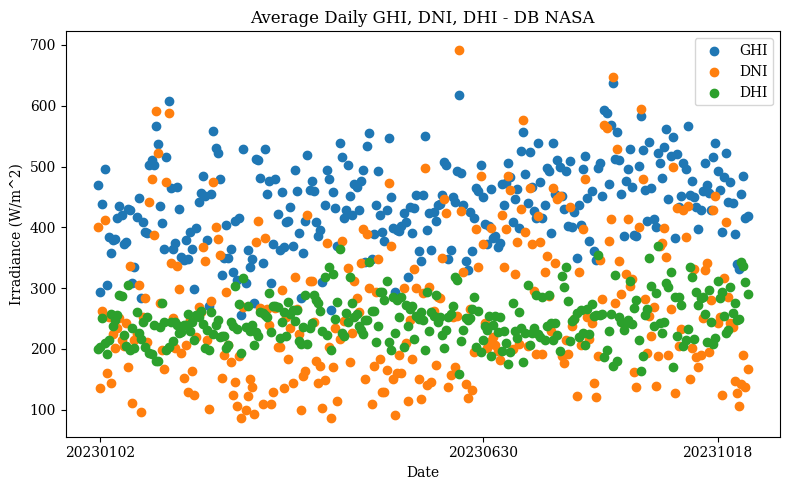

In [5]:
# Crear una figura
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'serif'
#scatter plot
plt.scatter(new_df['Date'], new_df['Average_GHI'], label='GHI')
plt.scatter(new_df['Date'], new_df['Average_DNI'], label='DNI')
plt.scatter(new_df['Date'], new_df['Average_DHI'], label='DHI')
# plt.plot(new_df['Date'], new_df['Average_GHI'], label='GHI')
# plt.plot(new_df['Date'], new_df['Average_DNI'], label='DNI')
# plt.plot(new_df['Date'], new_df['Average_DHI'], label='DHI')
plt.title('Average Daily GHI, DNI, DHI - DB NASA')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()
plt.xticks([1,180,290])
plt.tight_layout()



## New df with month information

In [8]:
# print(new_df.head())
# print(new_df.shape)

# Extraer los caracteres 5 y 6 de la columna 'Date'
new_df['Month'] = new_df['Date'].str.slice(4, 6)

# print(new_df.head())


unique_month = new_df['Month'].unique()
# print(unique_month)

# Encontrar el promedio de 'GHI' para cada mes
average_GHI_per_month = new_df.groupby('Month')['Average_GHI'].mean()
average_DHI_per_month = new_df.groupby('Month')['Average_DHI'].mean()
average_DNI_per_month = new_df.groupby('Month')['Average_DNI'].mean()
# print(average_GHI_per_month)
# print(average_DHI_per_month)
# print(average_DNI_per_month)

# Crear un nuevo DataFrame
new_df2 = pd.DataFrame({
    'Month': unique_month,
    'Average_GHI': average_GHI_per_month.values,
    'Average_DHI': average_DHI_per_month.values,
    'Average_DNI': average_DNI_per_month.values
})

# Guardar 'new_df2' como un archivo CSV
new_df2.to_csv('../Data/temporary/nasa_month.csv', index=False)
print(new_df2.head())


  Month  Average_GHI  Average_DHI  Average_DNI
0    01   413.709677   229.354839   272.387097
1    02   422.035714   233.035714   274.857143
2    03   394.838710   246.612903   200.806452
3    04   427.400000   261.166667   221.766667
4    05   424.483871   255.000000   238.806452


## Graph for Month

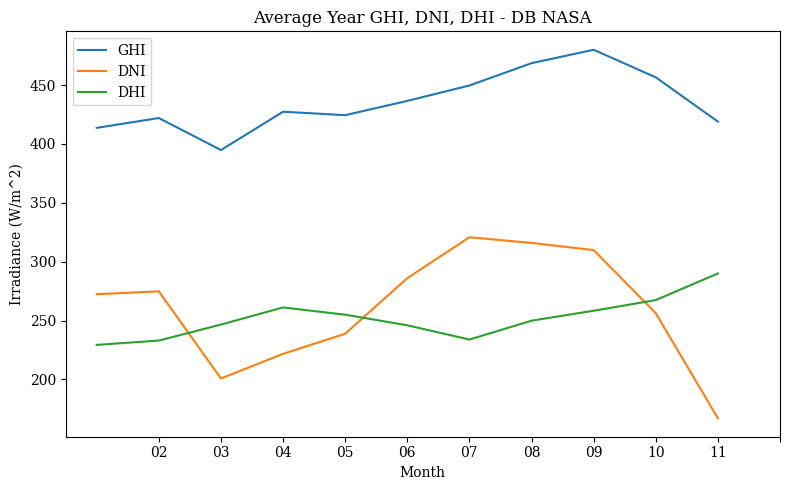

In [7]:
# Crear una figura 
plt.figure(figsize=(8,5))
plt.rcParams['font.family'] = 'serif'
#scatter plot
# plt.scatter(new_df2['Month'], new_df2['Average_GHI'], label='GHI')
# plt.scatter(new_df2['Month'], new_df2['Average_DNI'], label='DNI')
# plt.scatter(new_df2['Month'], new_df2['Average_DHI'], label='DHI')
plt.plot(new_df2['Month'], new_df2['Average_GHI'], label='GHI')
plt.plot(new_df2['Month'], new_df2['Average_DNI'], label='DNI')
plt.plot(new_df2['Month'], new_df2['Average_DHI'], label='DHI')
plt.title('Average Year GHI, DNI, DHI - DB NASA')
plt.xlabel('Month')
plt.ylabel('Irradiance (W/m^2)')
plt.legend()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.tight_layout()
